In [241]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
print("Tensorflow", tf.__version__)
print("numpy", np.__version__)
import matplotlib
print("matplotlib", matplotlib.__version__)
print("pandas", pd.__version__)
print("seaborn", sns.__version__)
import keras
print("keras", keras.__version__)
#print("pickle", pickle.__version__)
import sklearn
print("sklearn", sklearn.__version__)


Tensorflow 2.12.0
numpy 1.23.5
matplotlib 3.7.1
pandas 1.5.3
seaborn 0.12.2
keras 2.12.0
sklearn 1.2.2


In [102]:
|## 1: Cargar el archivo pulsar.csv

pulsar = pd.read_csv('Pulsar.csv')
pulsar.head()

Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0       140.562500  55.683782 -0.234571 -0.699648          3.199833   
1       102.507812  58.882430  0.465318 -0.515088          1.677258   
2       103.015625  39.341649  0.323328  1.051164          3.121237   
3       136.750000  57.178449 -0.068415 -0.636238          3.642977   
4        88.726562  40.672225  0.600866  1.123492          1.178930   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       19.110426        7.975532             74.242225      0  
1       14.860146       10.576487            127.393580      0  
2       21.744669        7.735822             63.171909      0  
3       20.959280        6.896499             53.593661      0  
4       11.468720       14.269573            252.567306      0

In [103]:
pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [104]:
pulsar.shape

(17898, 9)

In [105]:
# Reviso columna clase
pulsar.Class.value_counts()

0    16259
1     1639
Name: Class, dtype: int64

In [106]:
# 2: Busco NaNs
for col in pulsar.columns:
  print("La columna", col, " tiene ", pulsar[col].isna().sum() ," NaN")

La columna Mean_Integrated  tiene  0  NaN
La columna SD  tiene  0  NaN
La columna EK  tiene  0  NaN
La columna Skewness  tiene  0  NaN
La columna Mean_DMSNR_Curve  tiene  0  NaN
La columna SD_DMSNR_Curve  tiene  0  NaN
La columna EK_DMSNR_Curve  tiene  0  NaN
La columna Skewness_DMSNR_Curve  tiene  0  NaN
La columna Class  tiene  0  NaN


In [107]:
def plot_col (ds, co11, col2):

  fg = sns.scatterplot(data=ds, x=col1, y=col2)
  fg.set_title("{} contra {}".format(col1, col2))
  plt.show()


def plot_hist(ds,col1):

  fg = sns.histplot(data=ds, x=col1)
  fg.set_title("Histograma de {}".format(col1))
  plt.show()


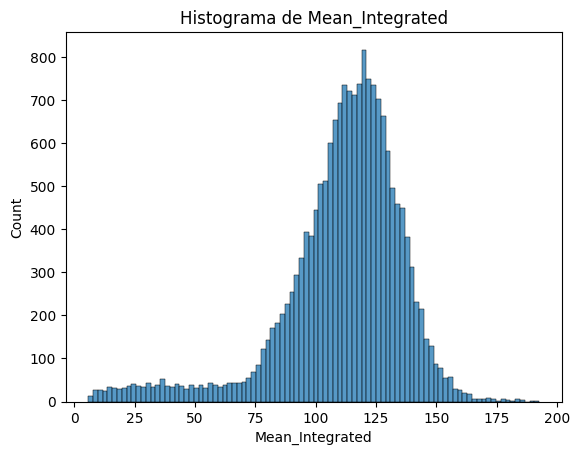

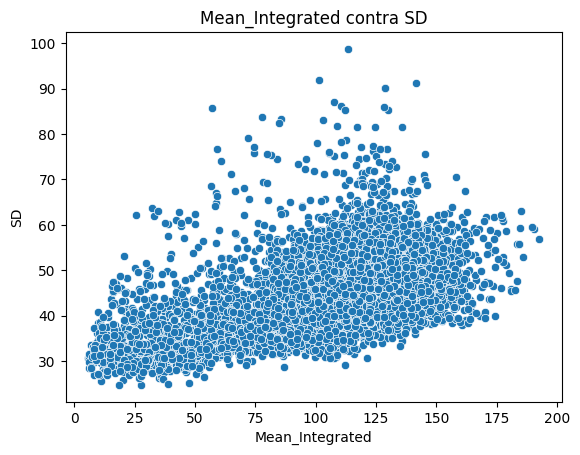

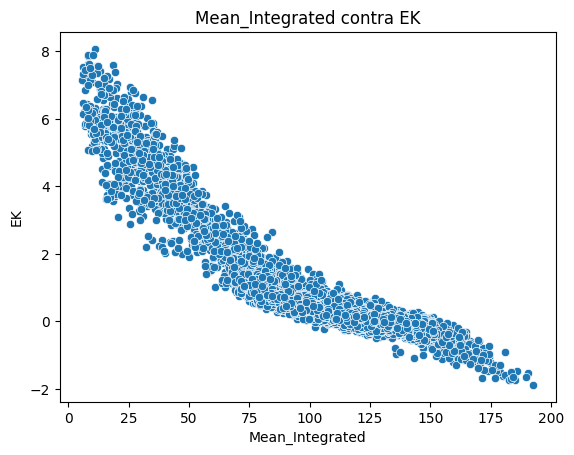

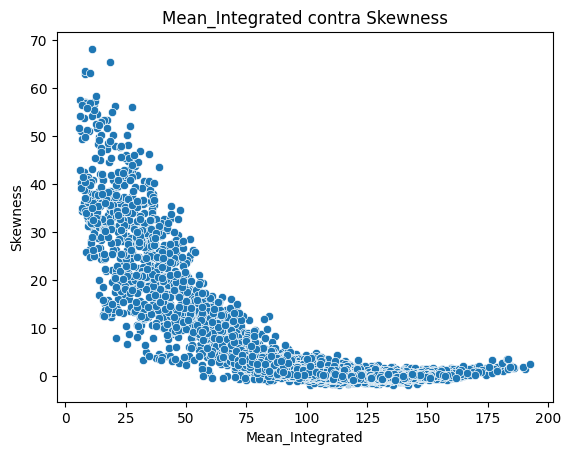

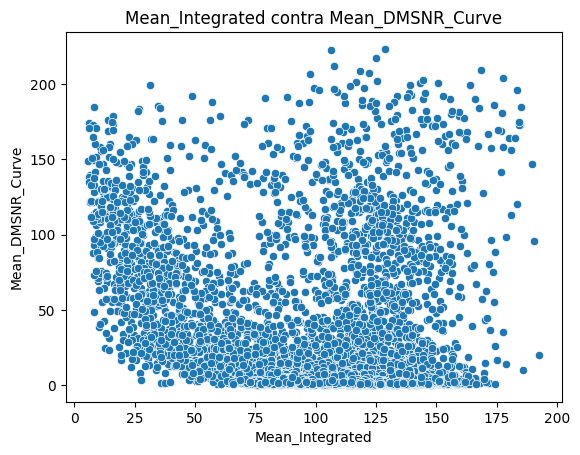

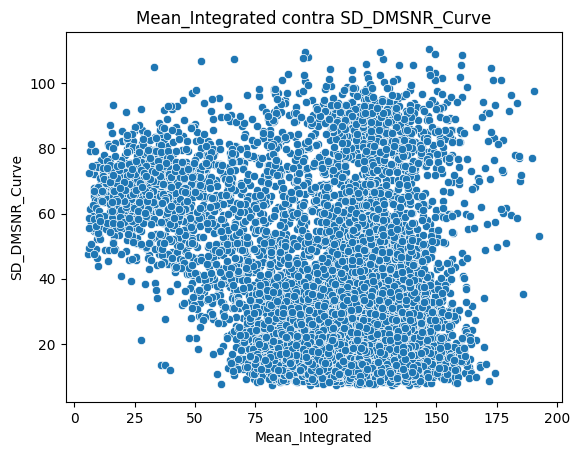

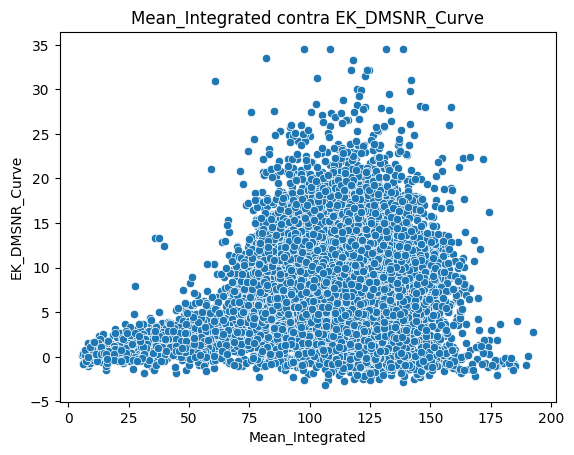

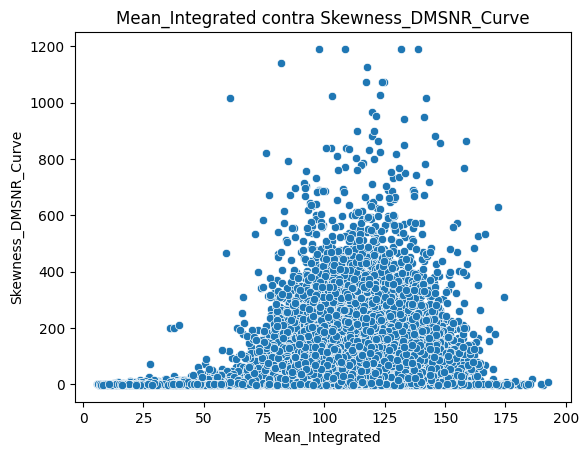

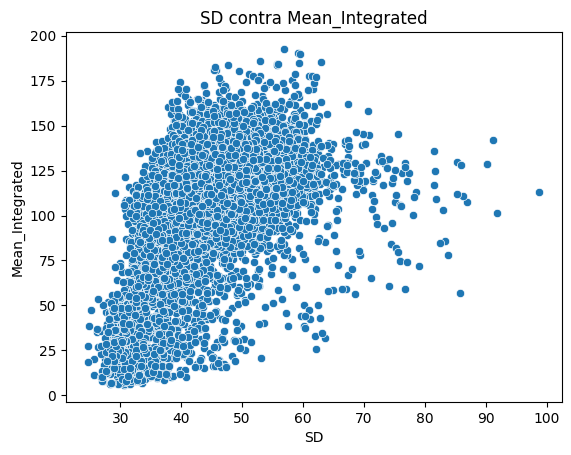

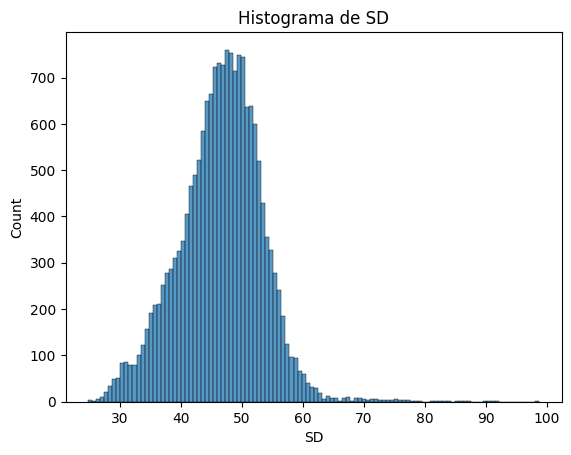

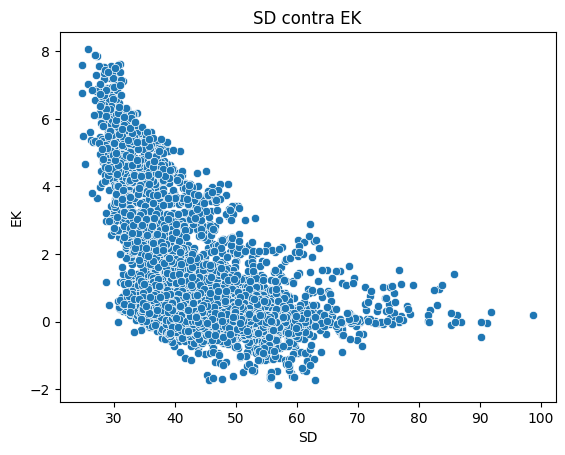

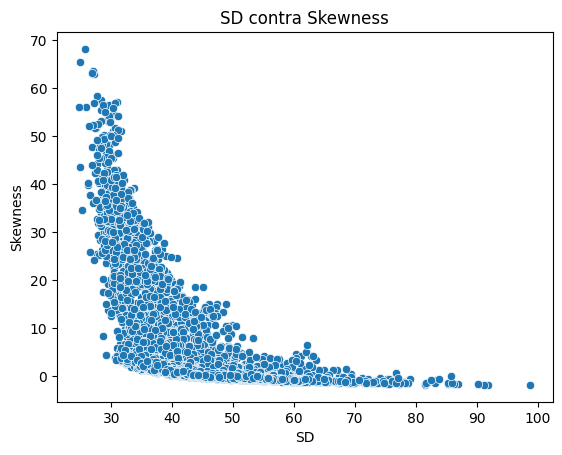

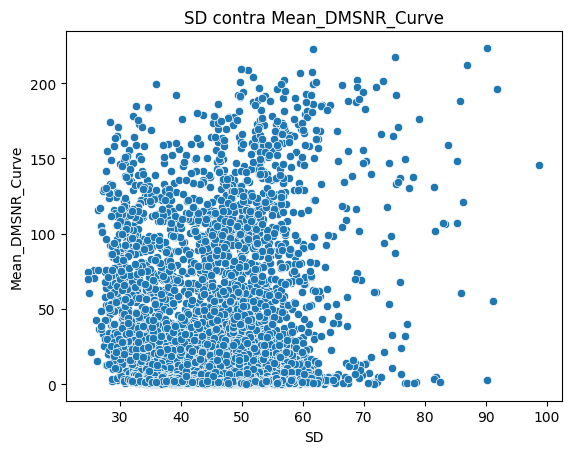

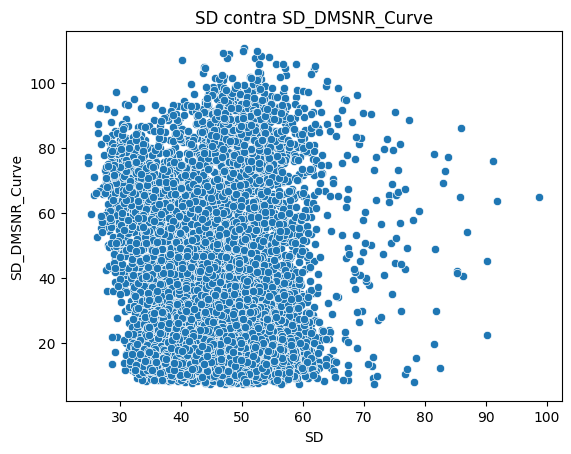

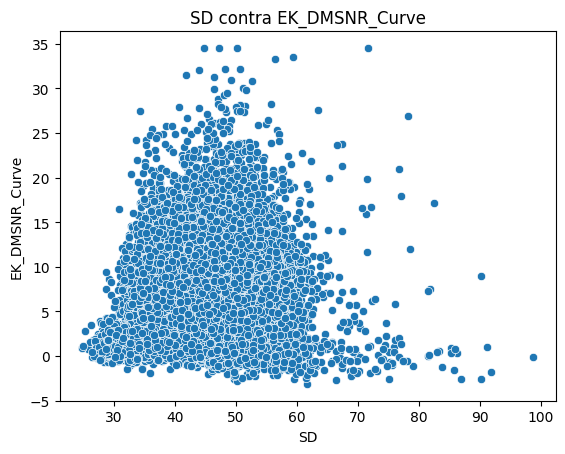

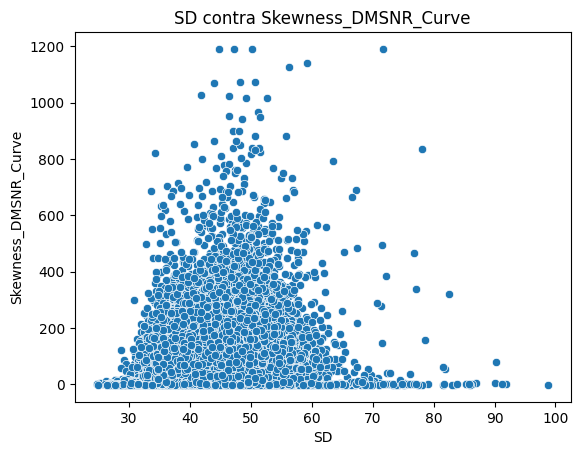

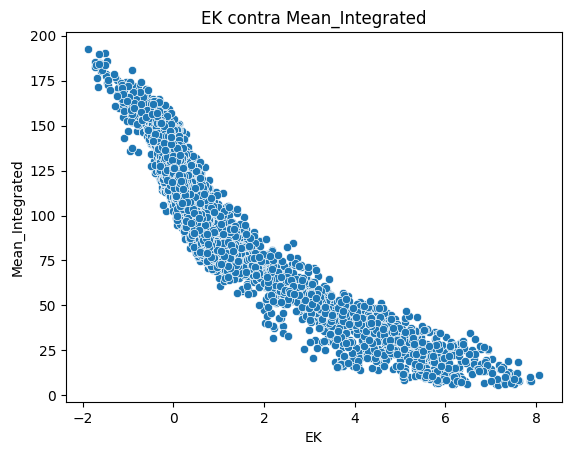

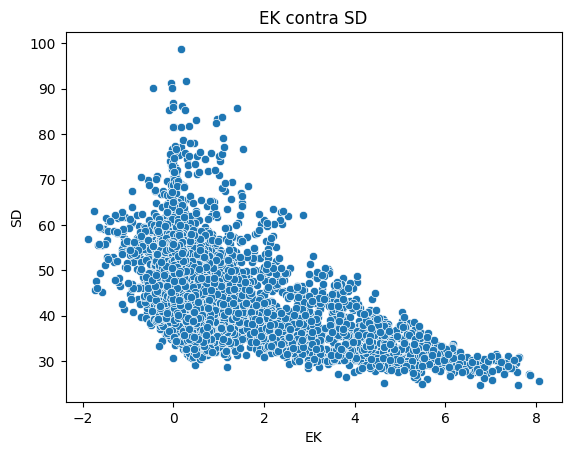

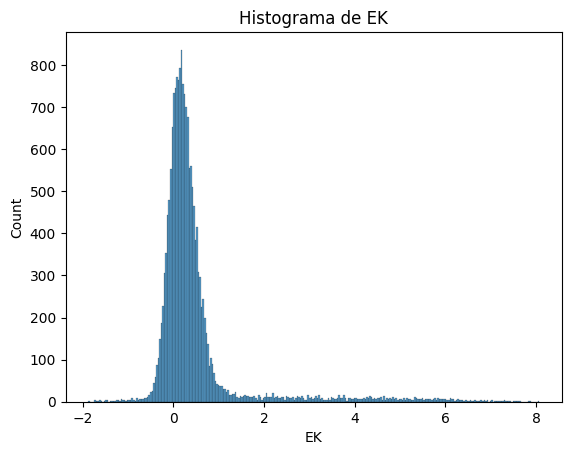

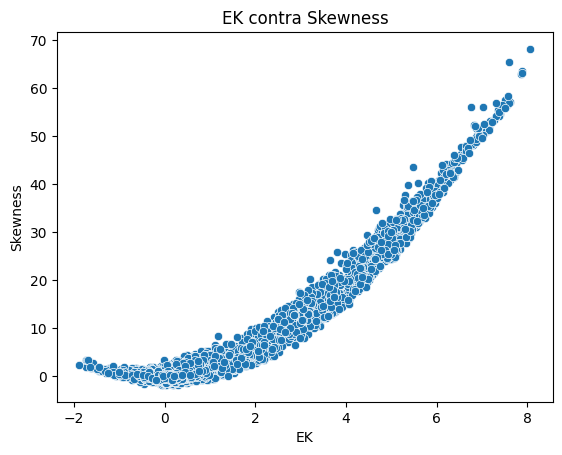

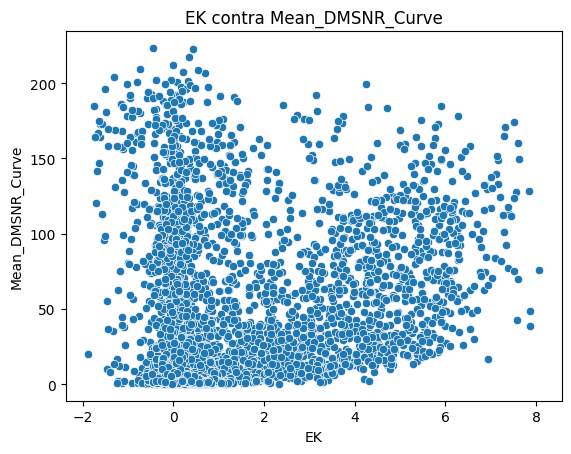

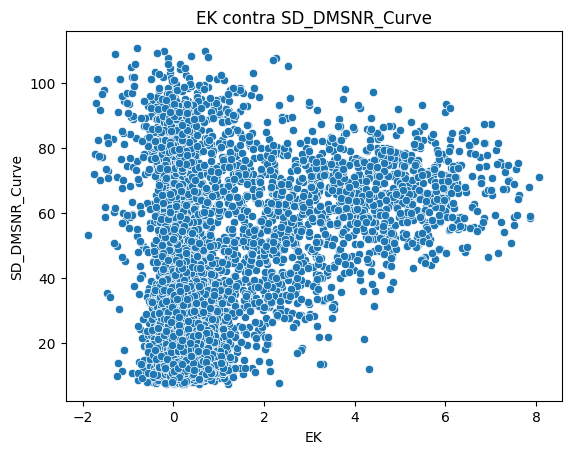

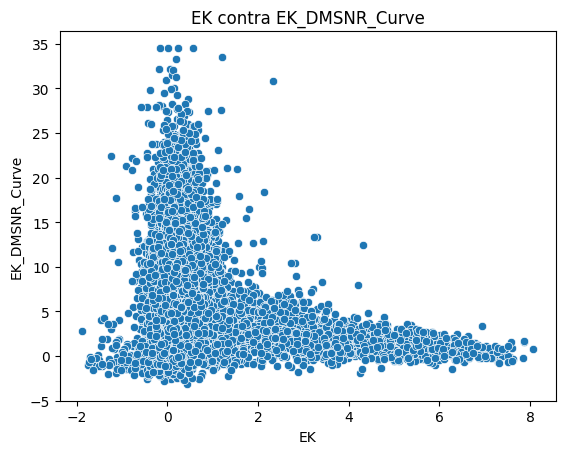

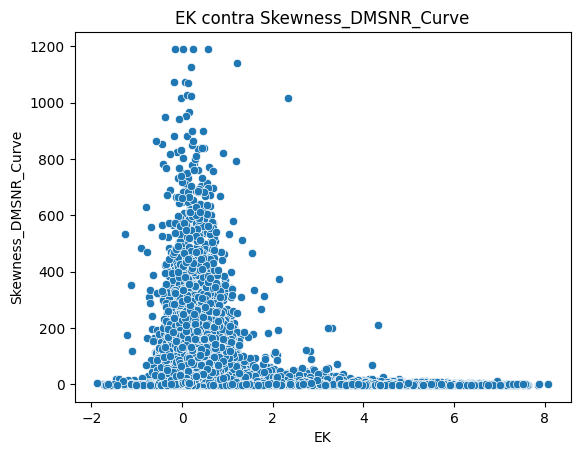

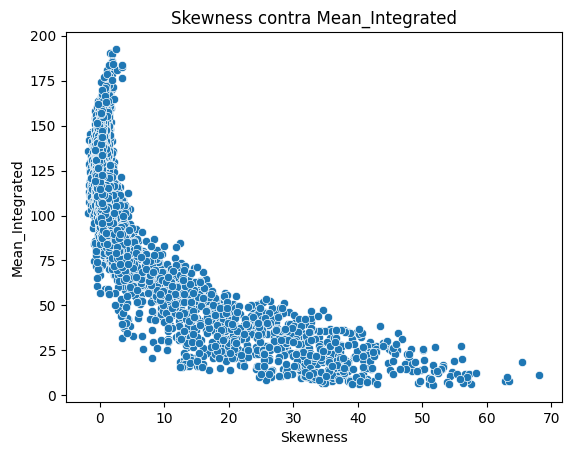

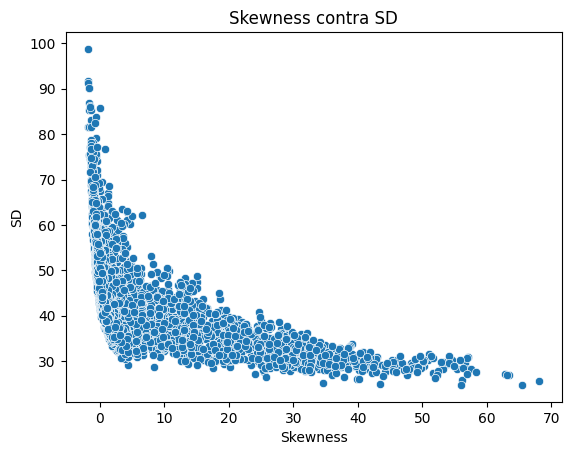

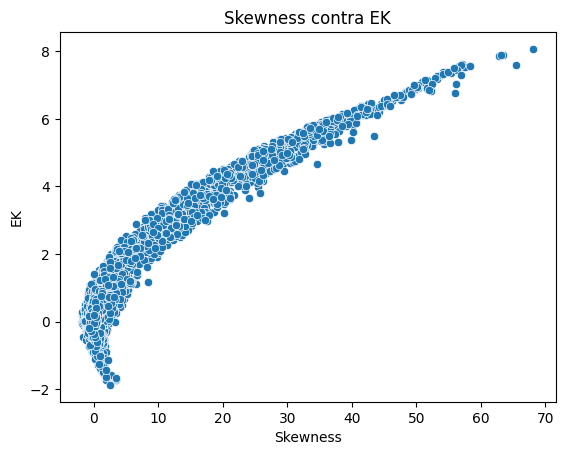

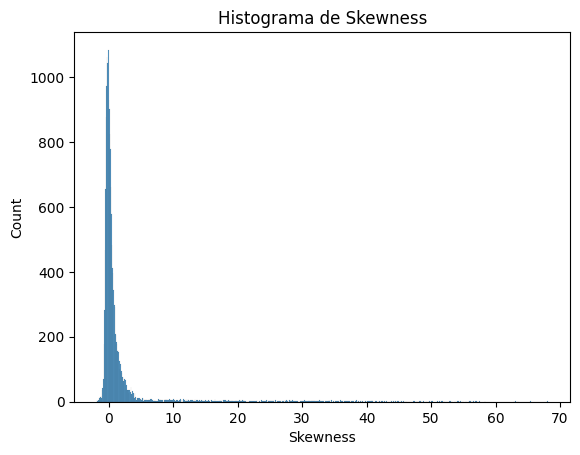

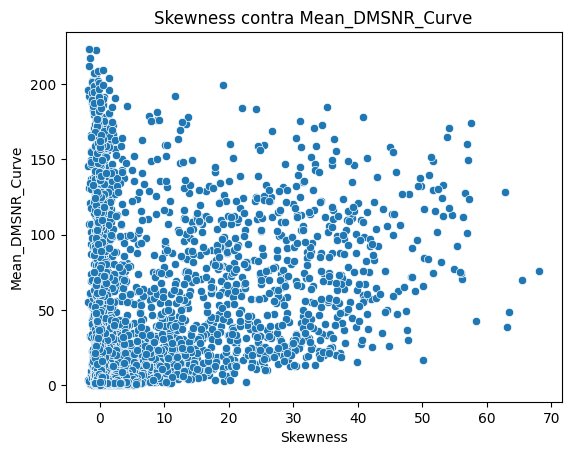

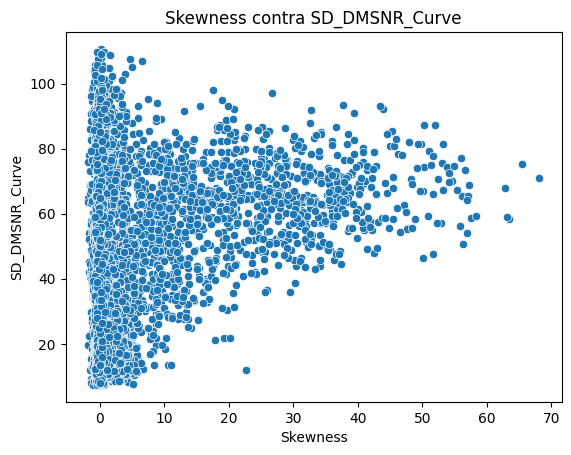

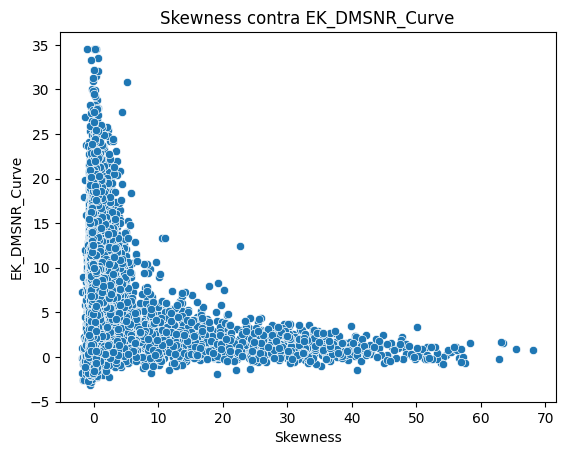

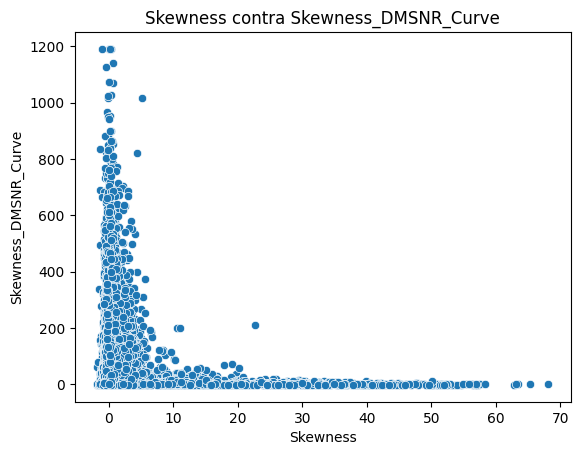

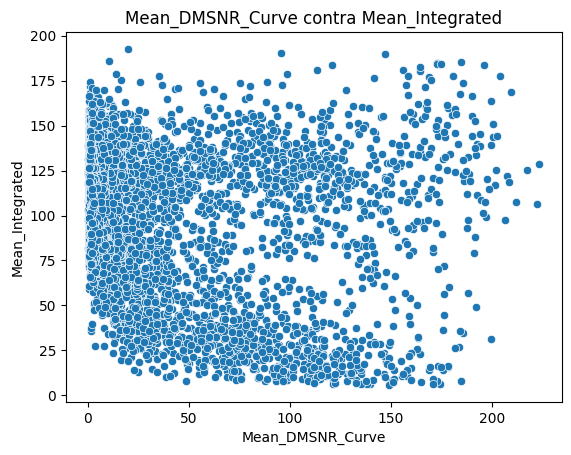

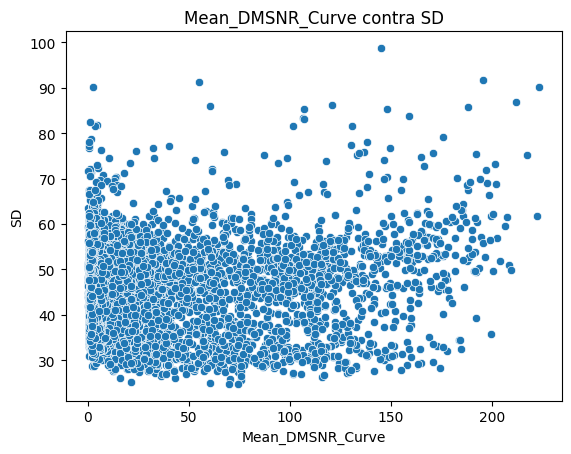

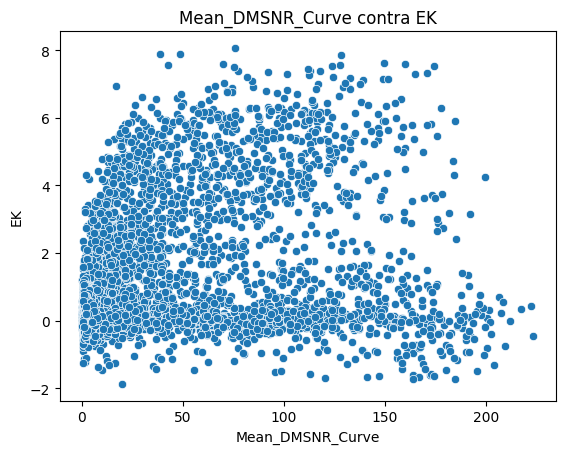

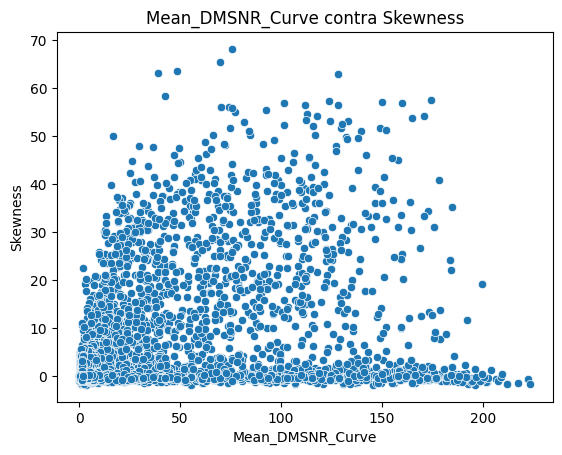

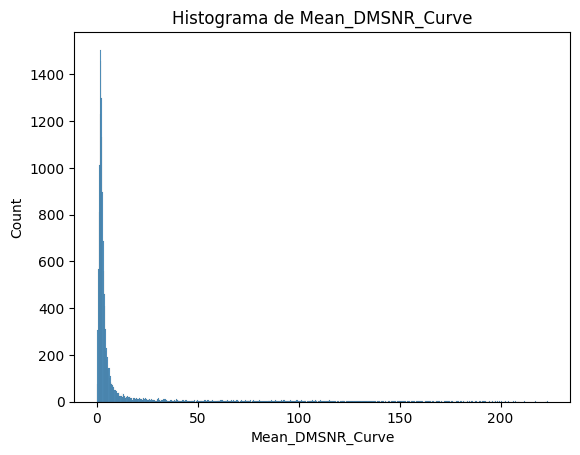

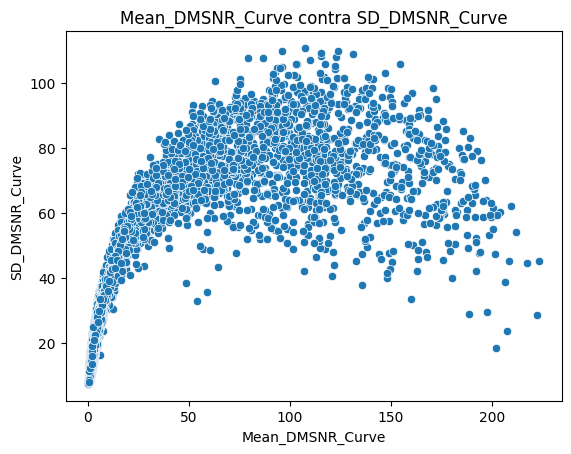

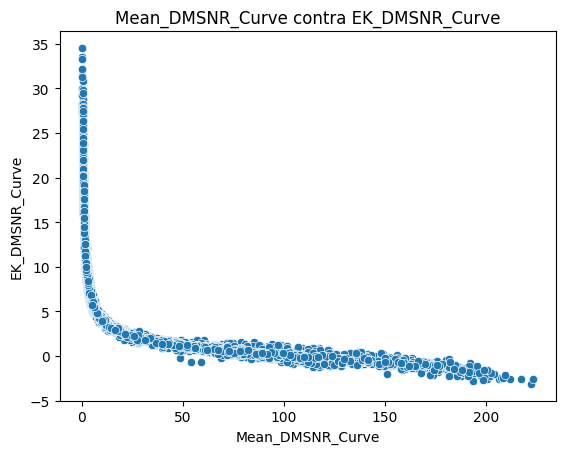

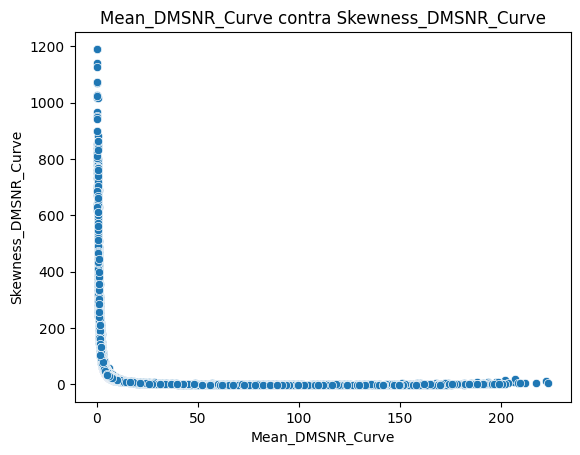

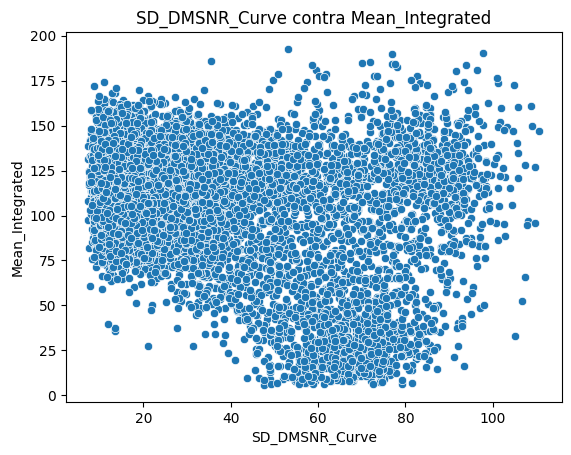

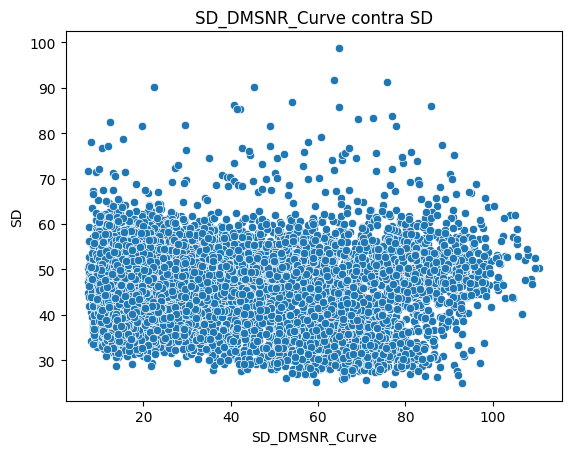

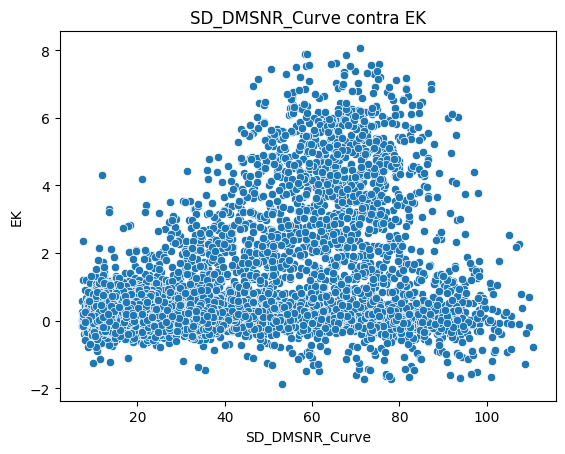

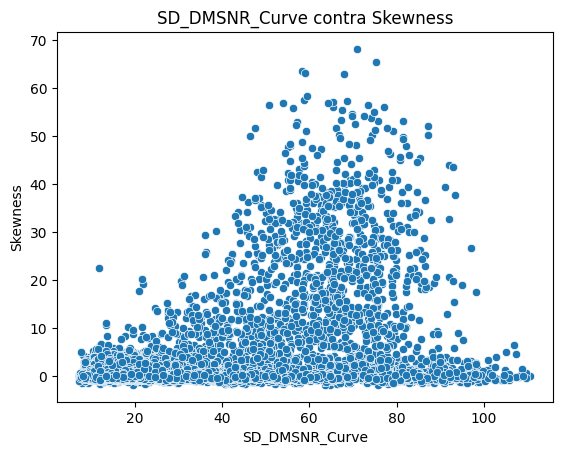

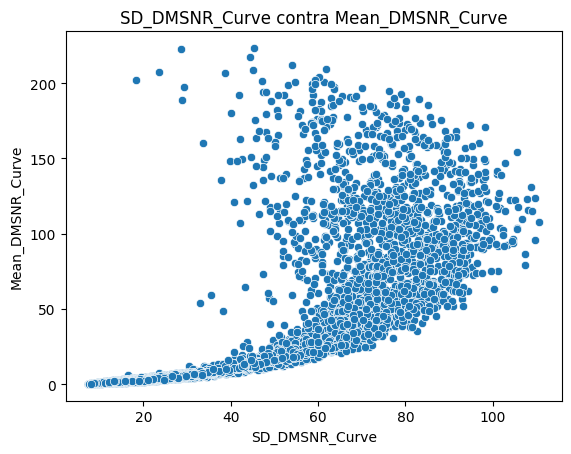

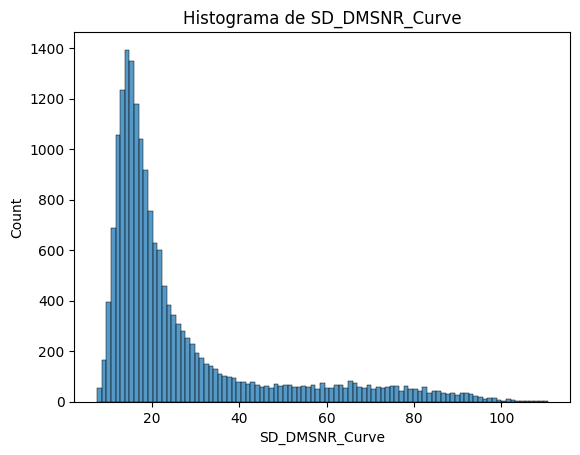

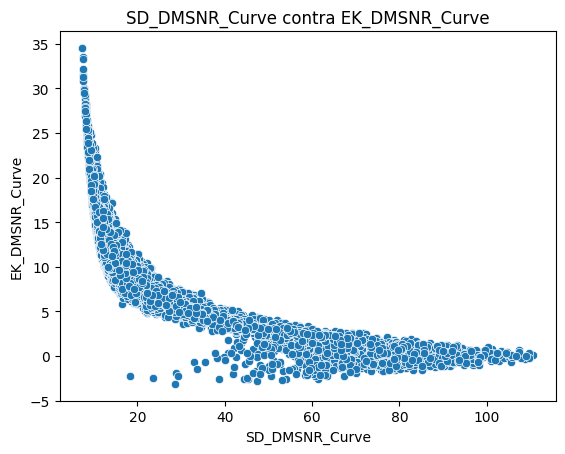

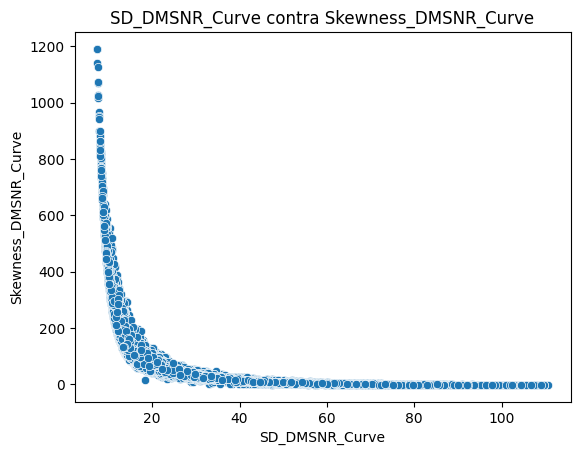

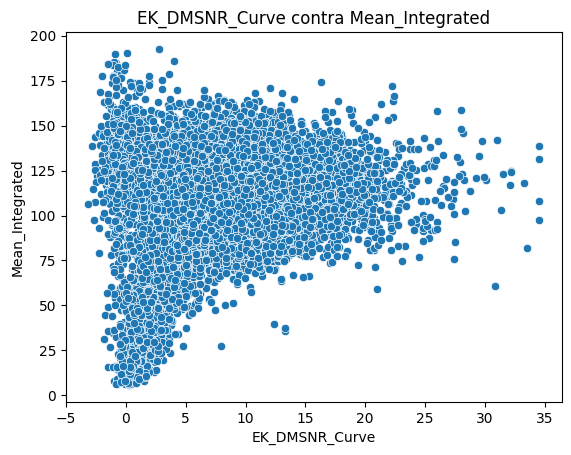

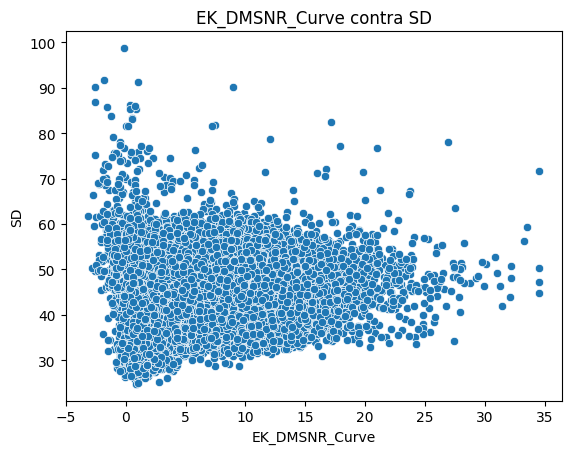

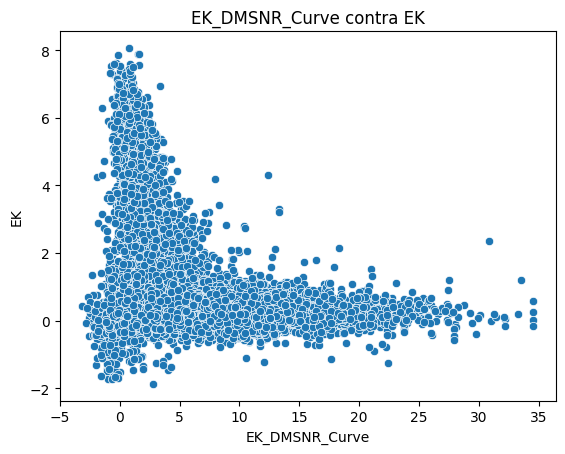

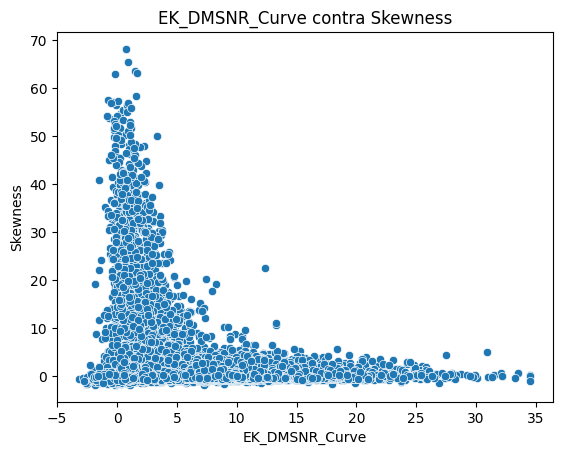

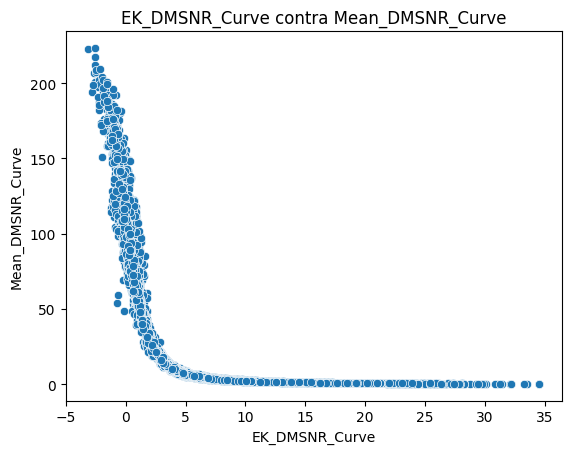

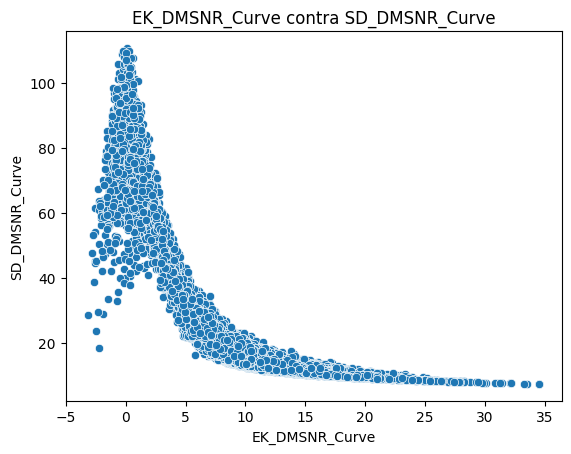

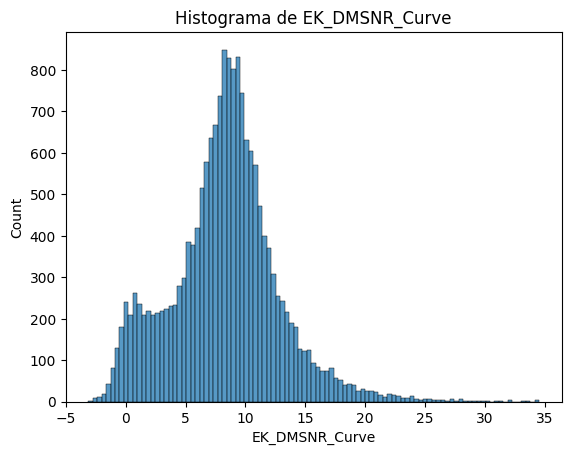

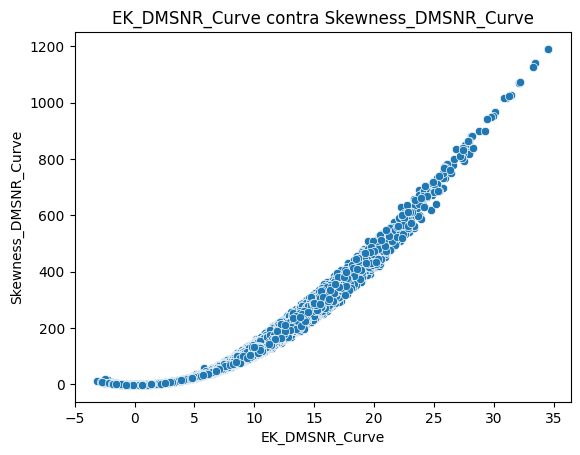

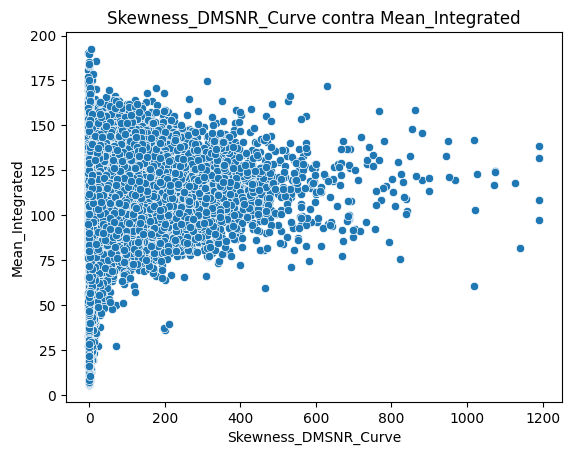

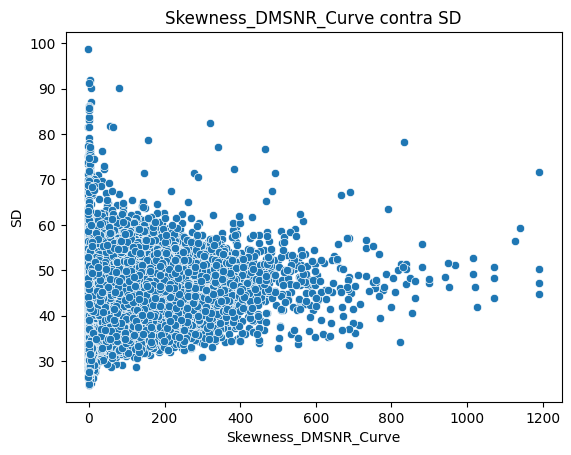

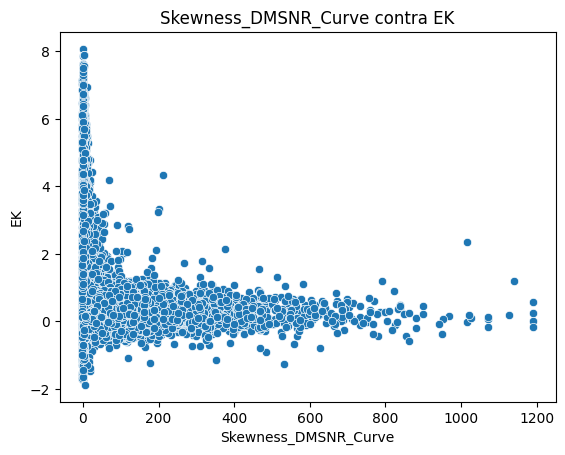

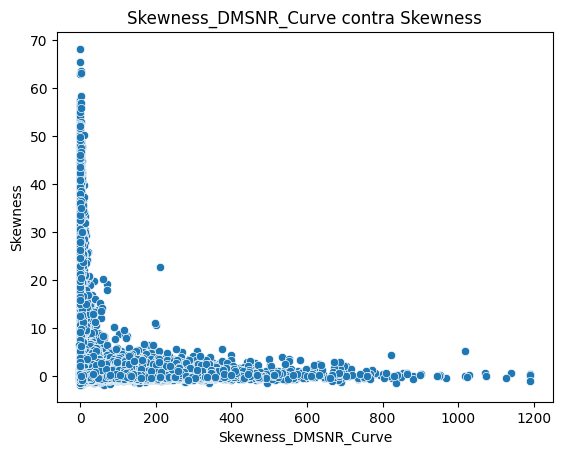

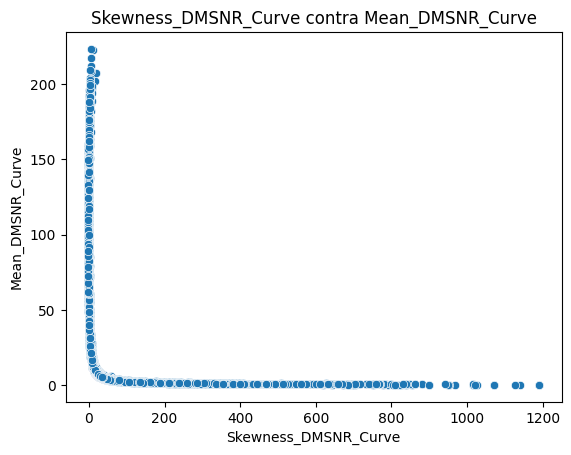

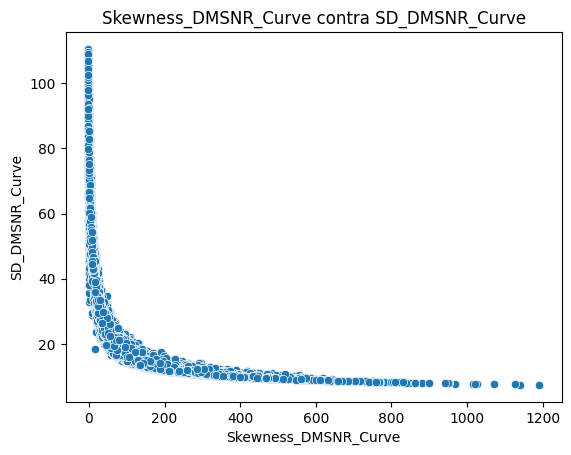

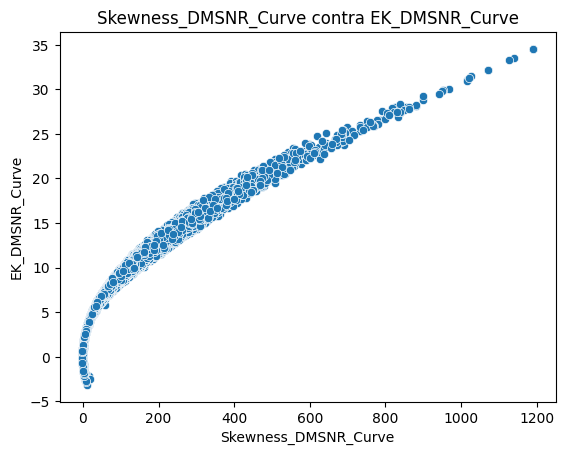

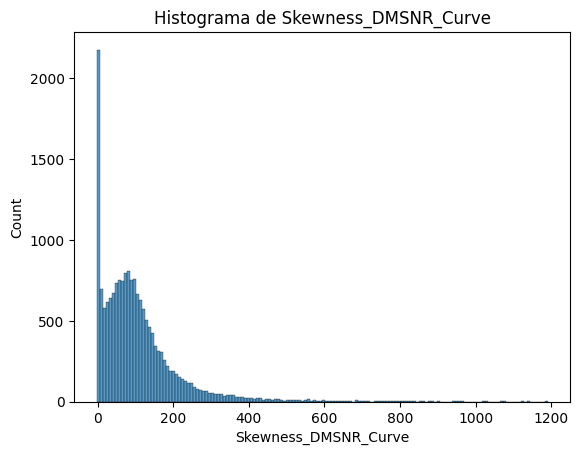

In [108]:
for col1 in pulsar.columns:
  for col2 in pulsar.columns:
    if col1=="Class" or col2=="Class":
      pass
    elif col1 == col2:
      plot_hist(pulsar, col1)
    else:
      plot_col(pulsar, col1,col2)


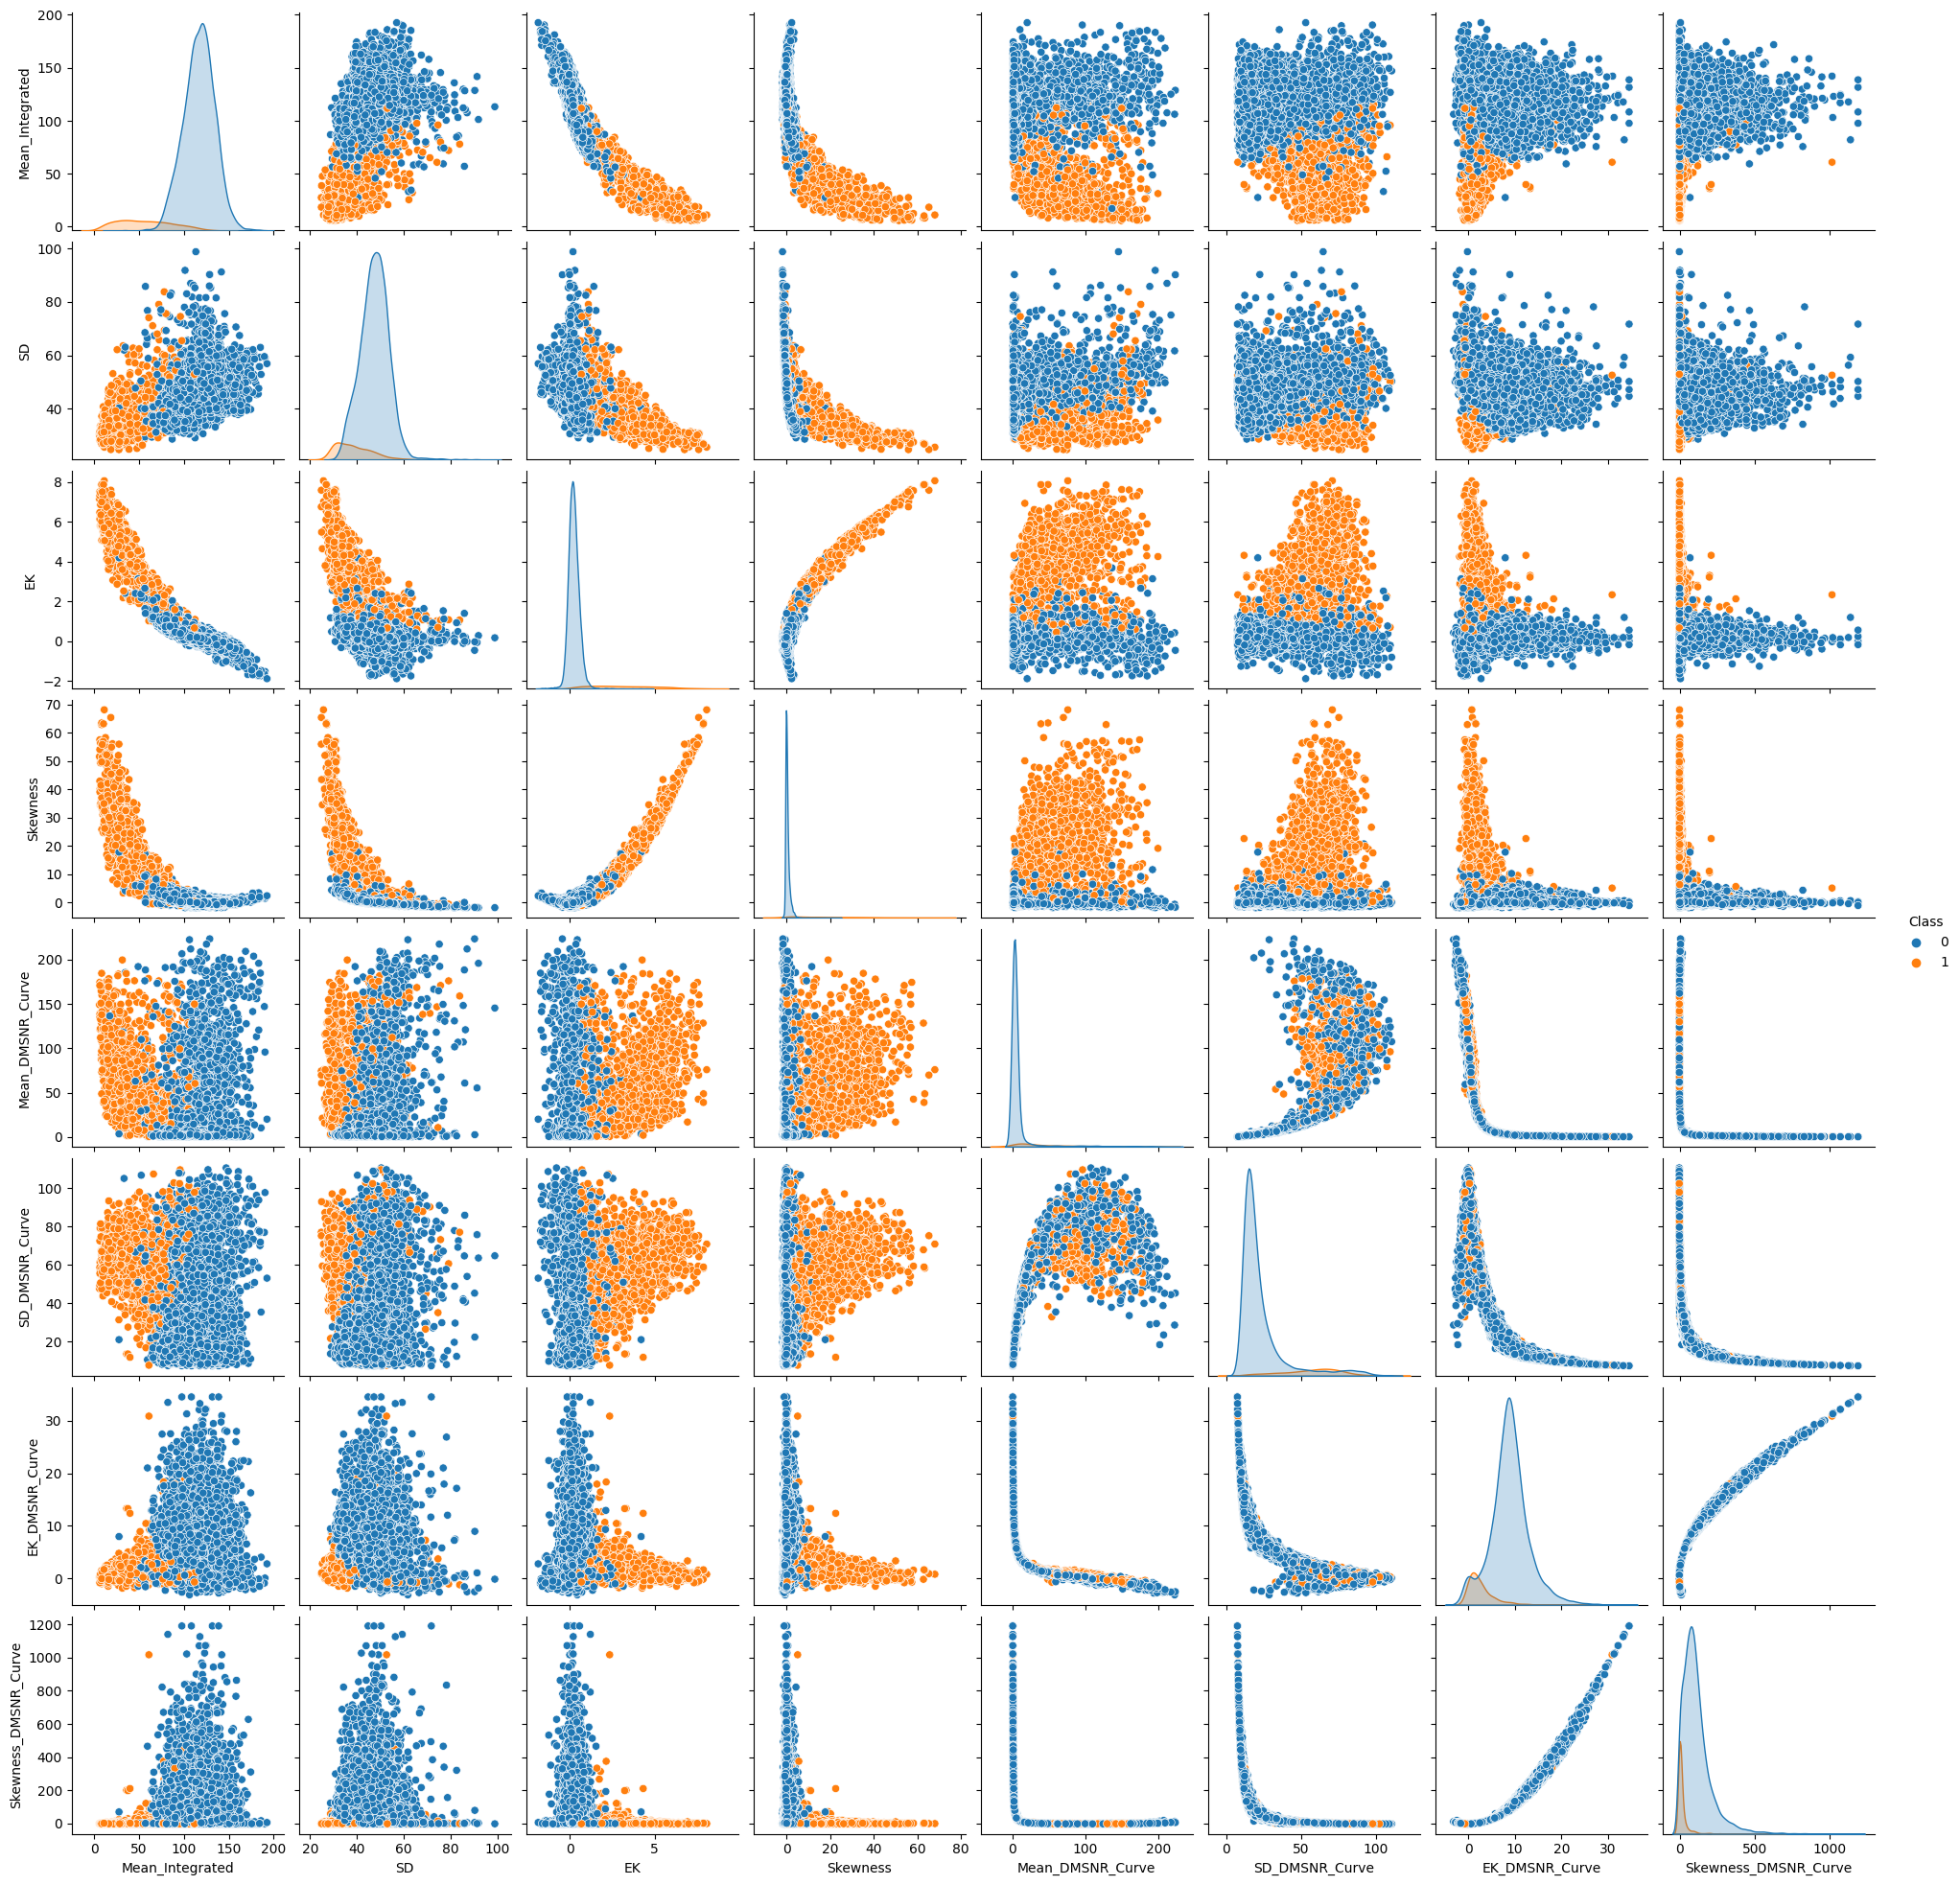

In [109]:
# Tambien visualizo usando pairplot
sns.pairplot(pulsar, hue="Class")

In [110]:
## Separo columna objetivo
target = pulsar['Class']
pulsar = pulsar.drop(columns='Class')

In [111]:
## Divido en train y val-test
x_train, x_valtest, y_train, y_valtest = train_test_split(pulsar, target, test_size=0.3, random_state=4)

## Divido en val y test
x_val, x_test, y_val, y_test = train_test_split(pulsar, target, test_size=0.5, random_state=5)


In [116]:
### Selección de variables
variables = ['Mean_Integrated', 'SD']

x_train = x_train[variables]
x_val = x_val[variables]
x_test = x_test[variables]


In [207]:
def normalizar(ds):
  scaler_train= StandardScaler()
  scaler_val= StandardScaler()
  scaler_test= StandardScaler()

  #scaler.fit_transform(ds[col])
  X_train_std = scaler_train.fit_transform(x_train)
  X_val_std = scaler_val.fit_transform(x_val)
  X_test_std = scaler_test.fit_transform(x_test)


  return scaler_train, scaler_val, scaler_test, X_train_std, X_val_std, X_test_std

In [208]:
scaler_train, scaler_val, scaler_test, X_train_std, X_val_std, X_test_std  = normalizar(pulsar)

In [209]:
X_train_std.shape

(12528, 2)

In [210]:
scaler_train

StandardScaler()

In [218]:
def modelo(este_lr):

  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(X_train_std.shape[1],1)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax') ## 2 por el numero de clases
  ])

  model.compile(optimizer= Adam(lr=este_lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  model.fit(X_train_std, y_train, epochs=10)

  val_loss, val_acc = model.evaluate(X_val_std,  y_val, verbose=2)
  return val_loss, val_acc

In [219]:
# Creación del modelo
## ML model architecture
##

todos_loss = []
todos_acc = []
todos_lr = np.linspace(0.000001, 0.01, 10) #Defino los learning rates a usar
for este_lr in todos_lr:
  val_loss, val_acc =  modelo(este_lr)
  todos_loss.append(val_loss)
  todos_acc.append(val_acc)
  print('\nVal accuracy:', val_acc)


Epoch 1/10
392/392 [==============================] - 2s 2ms/step - loss: 0.1630 - accuracy: 0.9568
Epoch 2/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1148 - accuracy: 0.9654
Epoch 3/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1138 - accuracy: 0.9659
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9665
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9662
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9657
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9658
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9666
Epoch 9/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1124 - accuracy: 0.9666
Epoch 10/10
392/392 [==============================] - 2s 5ms/step - loss: 0.1118 - accuracy: 0.9666


Val accuracy: 0.9673706293106079
Epoch 1/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9507
Epoch 2/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1155 - accuracy: 0.9656
Epoch 3/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.9657
Epoch 4/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1145 - accuracy: 0.9664
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9660
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9663
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9664
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9659
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9662
Epoch 10/10
392/392 [==============================] - 1s 2ms/step


Val accuracy: 0.968264639377594
Epoch 1/10
392/392 [==============================] - 2s 2ms/step - loss: 0.1673 - accuracy: 0.9520
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9654
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9663
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9678
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9663
Epoch 6/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9666
Epoch 7/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1128 - accuracy: 0.9664
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1131 - accuracy: 0.9666
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9654
Epoch 10/10
392/392 [==============================] - 1s 2ms/step 


Val accuracy: 0.9685998558998108
Epoch 1/10
392/392 [==============================] - 2s 2ms/step - loss: 0.1707 - accuracy: 0.9507
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9657
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1152 - accuracy: 0.9655
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1142 - accuracy: 0.9662
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1148 - accuracy: 0.9654
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9661
Epoch 7/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1137 - accuracy: 0.9667
Epoch 8/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9658
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9660
Epoch 10/10
392/392 [==============================] - 1s 2ms/step


Val accuracy: 0.9680411219596863
Epoch 1/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1602 - accuracy: 0.9583
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9658
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1142 - accuracy: 0.9669
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9659
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9663
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9663
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9669
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9667
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9662
Epoch 10/10
392/392 [==============================] - 1s 3ms/step


Val accuracy: 0.9685998558998108
Epoch 1/10
392/392 [==============================] - 2s 2ms/step - loss: 0.1706 - accuracy: 0.9537
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9665
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1139 - accuracy: 0.9664
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1131 - accuracy: 0.9669
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9662
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9668
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9669
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1131 - accuracy: 0.9666
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9666
Epoch 10/10
392/392 [==============================] - 1s 2ms/step


Val accuracy: 0.967147171497345
Epoch 1/10
392/392 [==============================] - 2s 2ms/step - loss: 0.1617 - accuracy: 0.9594
Epoch 2/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1149 - accuracy: 0.9662
Epoch 3/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1148 - accuracy: 0.9662
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9675
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9665
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1135 - accuracy: 0.9675
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9661
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9667
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1124 - accuracy: 0.9669
Epoch 10/10
392/392 [==============================] - 1s 2ms/step 


Val accuracy: 0.9685998558998108
Epoch 1/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy: 0.9563
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.9662
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1142 - accuracy: 0.9664
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9654
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1133 - accuracy: 0.9669
Epoch 6/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1137 - accuracy: 0.9663
Epoch 7/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1129 - accuracy: 0.9670
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9661
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9663
Epoch 10/10
392/392 [==============================] - 1s 2ms/step


Val accuracy: 0.9687116146087646
Epoch 1/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.9602
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9660
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1144 - accuracy: 0.9658
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1139 - accuracy: 0.9662
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9670
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9666
Epoch 7/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1137 - accuracy: 0.9665
Epoch 8/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1126 - accuracy: 0.9666
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9665
Epoch 10/10
392/392 [==============================] - 1s 2ms/step


Val accuracy: 0.9687116146087646
Epoch 1/10
392/392 [==============================] - 2s 2ms/step - loss: 0.1663 - accuracy: 0.9566
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1152 - accuracy: 0.9666
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9666
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9668
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9662
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9669
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9665
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9669
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1126 - accuracy: 0.9670
Epoch 10/10
392/392 [==============================] - 1s 2ms/step

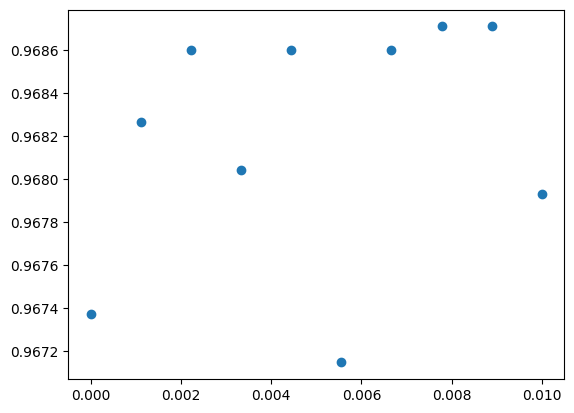

In [220]:
plt.scatter(todos_lr, todos_acc)
#plt.xscale('log')
#plt.ylim([0.9, 0.92])

In [235]:
## Elijo lr con mayor accuracy
lr_final = todos_lr[todos_acc.index(max(todos_acc))]
print("Learning rate = ", lr_final)
 # Entreno modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(len(x_train.columns),1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax') ## 2 por el numero de clases
])

model.compile(optimizer= Adam(learning_rate=lr_final),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

val_loss, val_acc = model.evaluate(x_val,  y_val, verbose=2)

Learning rate =  0.007778
Epoch 1/10
392/392 [==============================] - 2s 2ms/step - loss: 0.3783 - accuracy: 0.9393
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1446 - accuracy: 0.9587
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1326 - accuracy: 0.9604
Epoch 4/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9634
Epoch 5/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1224 - accuracy: 0.9647
Epoch 6/10
392/392 [==============================] - 1s 3ms/step - loss: 0.1256 - accuracy: 0.9622
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1242 - accuracy: 0.9642
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1207 - accuracy: 0.9651
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9656
Epoch 10/10
392/392 [==============================] - 1s 2ms/step - loss:

In [222]:
 ## Evaluo modelo en set de test
 test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

280/280 - 0s - loss: 0.1228 - accuracy: 0.9626 - 380ms/epoch - 1ms/step


In [233]:
## Guardo modelo en formato pickle
filename_mod = 'modeloentrenado.pkl'

def guardar_modelo(mod, filename):
  pickle.dump(mod, open(filename, 'wb'))

guardar_modelo(model, filename_mod)

In [225]:
## Guardo Normalizador en formato pickle
filename_norm_train = 'normalizadorentrenado_train.pkl'
filename_norm_val = 'normalizadorentrenado_val.pkl'
filename_norm_test = 'normalizadorentrenado_test.pkl'

with open(filename_norm_train,'wb') as f:
    pickle.dump(scaler_train, f)
with open(filename_norm_val,'wb') as f:
    pickle.dump(scaler_val, f)
with open(filename_norm_test,'wb') as f:
    pickle.dump(scaler_test, f)
#pickle.dump(scaler_train,  open(filename_norm_train, 'wb'))
#pickle.dump(scaler_val, open(filename_norm_val, 'wb'))
#pickle.dump(scaler_test, open(filename_norm_test, 'wb'))